In [7]:
from model import ChoiceModel

import pandas as pd



def evaluate_gl(desire, choice_type, num_sample=1000, seed=42):
    choice_model = ChoiceModel(
        data_dir='data', desire=desire, choice_type=choice_type,
        sample_num=num_sample, skip_init=True, seed=seed)

    error, kl_divergence = choice_model.evaluate(figsize=(20, 3), plot=False)
    return error, kl_divergence

df = pd.DataFrame(columns=['desire', 'choice_type', 'num_sample', 'error', 'kl_divergence'])

desire = 'Eat'
for choice_type in ['mode','amenity']:
    for i,num_sample in enumerate([0,1000]):
        error, kl_divergence = evaluate_gl(desire, choice_type, num_sample=num_sample)
        df.loc[len(df)] = [desire, choice_type, num_sample, error['mean'], kl_divergence['mean']]

df

,desire,choice_type,num_sample,error,kl_divergence
0,Eat,mode,0,13.342923,0.099972
1,Eat,mode,1000,5.552694,0.019975
2,Eat,amenity,0,14.144601,0.214809
3,Eat,amenity,1000,7.188765,0.074316


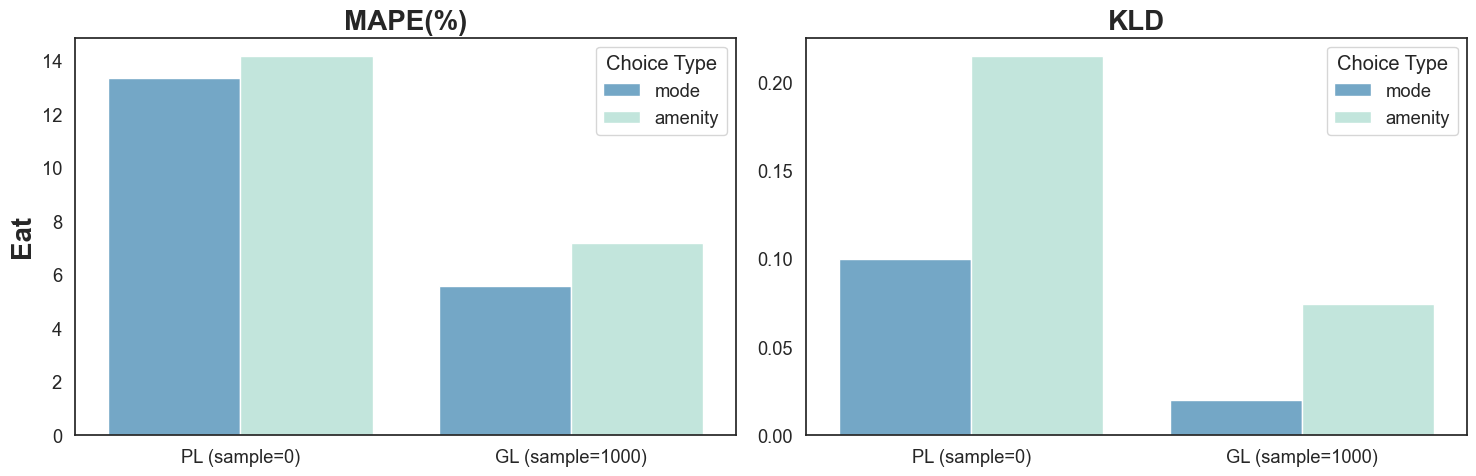

In [36]:
# Visualize the results

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter

# Set the style for academic papers
custom_colors = ["#66AAD4", "#bcebdf"]

sns.set_theme(style="white", palette=custom_colors, font_scale=1.2)

# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Add numbers on top of the bars for error
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 9), 
                 textcoords = 'offset points')
    
# Plot error on the first subplot
sns.barplot(x='num_sample', y='error', hue='choice_type', data=df, ax=ax1)
ax1.set_xlabel('')
ax1.xaxis.set_major_locator(FixedLocator([0, 1]))
ax1.xaxis.set_major_formatter(FixedFormatter(['PL (sample=0)', 'GL (sample=1000)']))
ax1.set_ylabel('Eat', fontweight='bold', fontsize=20)
ax1.set_title('MAPE(%)', fontweight='bold', fontsize=20)

# Add numbers on top of the bars for KL divergence
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.3f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 9), 
                 textcoords = 'offset points')
    
# Plot KL divergence on the second subplot
sns.barplot(x='num_sample', y='kl_divergence', hue='choice_type', data=df, ax=ax2)
ax2.set_xlabel('')
ax2.xaxis.set_major_locator(FixedLocator([0, 1]))
ax2.xaxis.set_major_formatter(FixedFormatter(['PL (sample=0)', 'GL (sample=1000)']))
ax2.set_ylabel('')
ax2.set_title('KLD', fontweight='bold', fontsize=20)

# Adjust the legends
ax1.legend(loc='upper right', title='Choice Type')
ax2.legend(loc='upper right', title='Choice Type')

plt.tight_layout()
plt.savefig('results/pl_vs_gl.png')
plt.show()